In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [ ]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

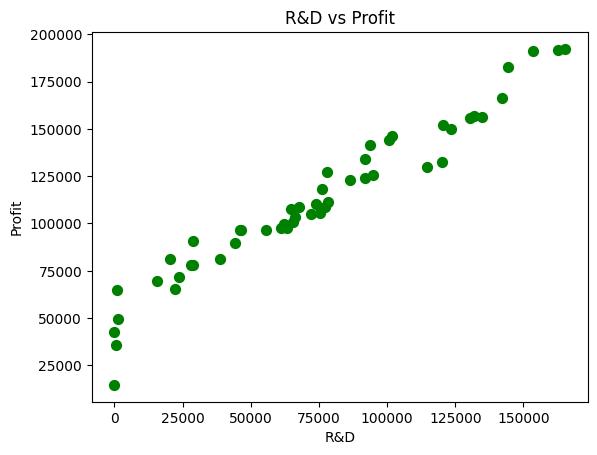

In [ ]:
x1 = df.iloc[:, 0].values
y1 = df.iloc[:, -1].values
plt.scatter(x1, y1,color='Green',s=50)
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.title('R&D vs Profit')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

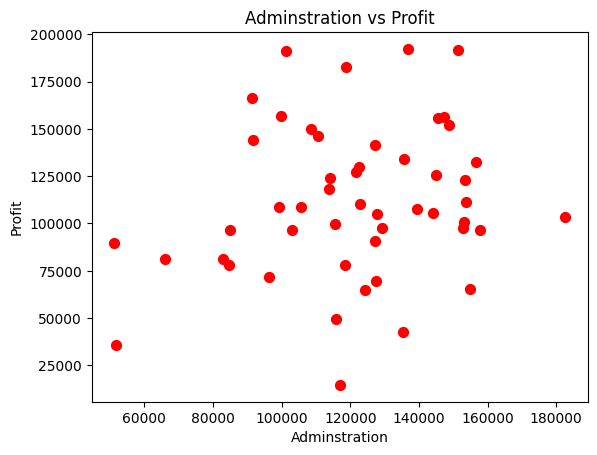

In [ ]:
x1 = df.iloc[:, 1].values
y1 = df.iloc[:, -1].values
plt.scatter(x1, y1,color='Red',s=50)
plt.xlabel('Adminstration')
plt.ylabel('Profit')
plt.title('Adminstration vs Profit')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

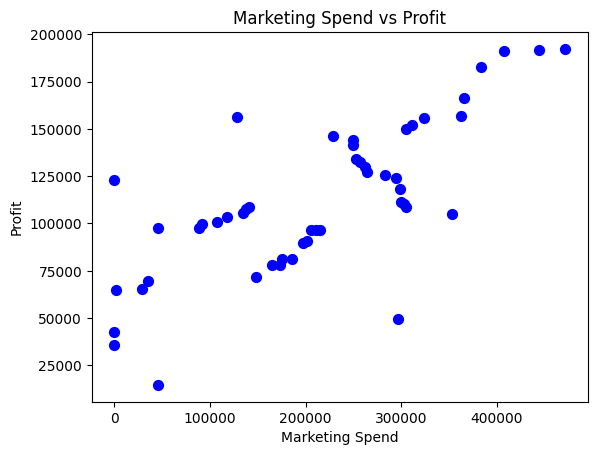

In [ ]:
x1 = df.iloc[:, 2].values
y1 = df.iloc[:, -1].values
plt.scatter(x1, y1,color='Blue',s=50)
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Marketing Spend vs Profit')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

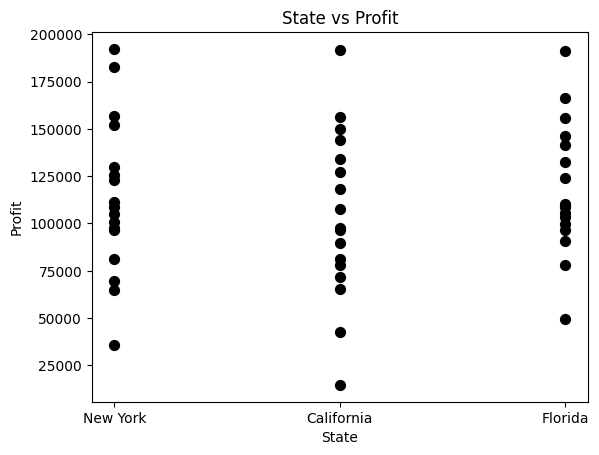

In [ ]:
x1 = df.iloc[:, 3].values
y1 = df.iloc[:, -1].values
plt.scatter(x1, y1,color='black',s=50)
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('State vs Profit')
plt.show

In [ ]:
df.State.value_counts()

,count
State,
New York,17
California,17
Florida,16


In [ ]:
df['New York'] = np.where(df['State']=='New York',1,0)
df['California'] = np.where(df['State']=='California',1,0)
df['Florida'] = np.where(df['State']=='Florida',1,0)
df.drop(columns=['State'],axis=1,inplace=True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,New York,California,Florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [ ]:
y='Profit'

In [ ]:
x=df.columns.tolist()
x.remove(y)
x

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'New York',
 'California',
 'Florida']

In [ ]:
x=df[x].values

In [ ]:
y=df[y].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.4738321 , 0.4510652 , 0.31668231, 1.        , 0.        ,
        0.        ],
       [0.00333369, 0.00432296, 0.        , 1.        , 0.        ,
        0.        ],
       [0.58215559, 0.88143739, 0.63657411, 1.        , 0.        ,
        0.        ],
       [0.577276  , 0.71456332, 0.56283007, 0.        , 0.        ,
        1.        ],
       [0.44347245, 0.71967718, 0.79564086, 1.        , 0.        ,
        0.        ],
       [0.34129603, 0.48655174, 0.48352224, 0.        , 0.        ,
        1.        ],
       [0.47979221, 0.66078277, 0.5955101 , 0.        , 1.        ,
        0.        ],
       [0.94368807, 0.4685842 , 0.91898151, 0.        , 0.        ,
        1.        ],
       [0.39769757, 0.82952141, 0.31079765, 0.        , 1.        ,
        0.        ],
       [0.73766874, 0.98922572, 0.57786386, 0.        , 0.        ,
        1.        ],
       [0.38127526, 0.60480846, 0.20529746, 0.        , 0.        ,
        1.        ],
       [0.81106252, 0

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.predict(X_test)

array([ 74061.28471133,  46009.2379876 ,  99637.26360759, 155786.53229373,
       127636.76349538, 192765.18597814,  63906.99972423,  54935.14415853,
        84532.35238007, 109460.29711993])

In [ ]:
#Evaluting Model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

y_pred=lr.predict(X_test)
score = r2_score(y_test,y_pred)
print(f'Accuracy Score:{score}')

Accuracy Score:0.9783259006626639
